In [36]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [35]:
#!pip install geocoder

     |████████████████████████████████| 102kB 911kB/s ta 0:00:01


In [39]:
# Foursquare credentials
CLIENT_ID = 'R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K' # your Foursquare ID
CLIENT_SECRET = '4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K
CLIENT_SECRET:4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW


## Load London crime data

In [95]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [96]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [97]:
df.shape

(13490604, 7)

In [98]:
df2016 = df[df['year']==2016]

In [99]:
df2016.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [100]:
df2016.shape

(1498956, 7)

In [101]:
df2016 = df2016[df2016.value != 0]
df2016 = df2016.reset_index(drop=True)

In [102]:
df2016.shape

(392042, 7)

In [103]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       392042 non-null  object
 1   borough         392042 non-null  object
 2   major_category  392042 non-null  object
 3   minor_category  392042 non-null  object
 4   value           392042 non-null  int64 
 5   year            392042 non-null  int64 
 6   month           392042 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


In [104]:
df2016['borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

In [106]:
loncrime = pd.pivot_table(df2016,values=['value'],
                               index=['borough'],
                               columns=['major_category'],
                               aggfunc=np.sum,fill_value=0)
loncrime.head()

value                                                  \
major_category       Burglary Criminal Damage Drugs Other Notifiable Offences   
borough                                                                         
Barking and Dagenham     1287            1949   919                       378   
Barnet                   3402            2183   906                       499   
Bexley                   1123            1673   646                       294   
Brent                    2631            2280  2096                       536   
Bromley                  2214            2202   728                       417   

                                                                             
major_category       Robbery Theft and Handling Violence Against the Person  
borough                                                                      
Barking and Dagenham     534               5607                        6067  
Barnet                   464               9731                        7499  
Bexley                   209               4392                        4503  
Brent                    919               9026                        9205  
Bromley                  369               7584                        6650

In [107]:
loncrime.reset_index(inplace=True)

In [108]:
loncrime.columns

MultiIndex([('borough',                            ''),
            (  'value',                    'Burglary'),
            (  'value',             'Criminal Damage'),
            (  'value',                       'Drugs'),
            (  'value',   'Other Notifiable Offences'),
            (  'value',                     'Robbery'),
            (  'value',          'Theft and Handling'),
            (  'value', 'Violence Against the Person')],
           names=[None, 'major_category'])

In [109]:
loncrime.columns = ['borough', 'Buglary', 'Criminal Damage', 'Drugs', 'Other Notifiable Offences', 
                    'Robbery', 'Theft and Handling', 'Violence Aginst the Person']

In [110]:
loncrime['Total'] = loncrime.sum(axis=1)

In [111]:
loncrime.head()

,borough,Buglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Aginst the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [112]:
loncrime.shape

(33, 9)

## Getting information of the different Boroughs in London from wiki

In [395]:
html = wp.page('List of London boroughs').html()

In [396]:
dflonbor = pd.read_html(html, header = 0)[0]

In [397]:
dflonbor.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [398]:
dflonbor.shape

(32, 10)

In [399]:
dflonbor_2 = pd.read_html(html, header = 0)[1]

In [400]:
dflonbor_2

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [401]:
dflonbor = dflonbor.append(dflonbor_2, ignore_index=True)

In [402]:
dflonbor.shape

(33, 12)

In [403]:
dflonbor.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890.0,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8.0,NaN,NaN
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797.0,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28.0,NaN,NaN
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516.0,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5.0,NaN,NaN
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2.0,NaN,NaN
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,NaN,7000.0,1.0


In [404]:
dflonbor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   33 non-null     object 
 1   Inner                     4 non-null      object 
 2   Status                    5 non-null      object 
 3   Local authority           33 non-null     object 
 4   Political control         33 non-null     object 
 5   Headquarters              33 non-null     object 
 6   Area (sq mi)              33 non-null     float64
 7   Population (2013 est)[1]  32 non-null     float64
 8   Co-ordinates              33 non-null     object 
 9   Nr. in map                32 non-null     float64
 10  Population(2011 est)      1 non-null      float64
 11  Nr. inmap                 1 non-null      float64
dtypes: float64(5), object(7)
memory usage: 3.2+ KB


In [405]:
dflonbor = dflonbor.replace('note 1', '', regex=True)
dflonbor = dflonbor.replace('note 2', '', regex=True)
dflonbor = dflonbor.replace('note 3', '', regex=True)
dflonbor = dflonbor.replace('note 4', '', regex=True)
dflonbor = dflonbor.replace('note 5', '', regex=True)

In [406]:
dflonbor

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719.0,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11.0,NaN,NaN
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752.0,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19.0,NaN,NaN
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494.0,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13.0,NaN,NaN
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524.0,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30.0,NaN,NaN
9,Greenwich [],[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008.0,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22.0,NaN,NaN


In [407]:
set(loncrime.Borough) - set(dflonbor.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

In [408]:
dflonbor.index[dflonbor['Borough'] == 'Barking and Dagenham []'].tolist()

[0]

In [409]:
dflonbor.index[dflonbor['Borough'] == 'Greenwich []'].tolist()

[9]

In [410]:
dflonbor.index[dflonbor['Borough'] == 'Hammersmith and Fulham []'].tolist()

[11]

In [411]:
dflonbor.iloc[0,0] = 'Barking and Dagenham'
dflonbor.iloc[9,0] = 'Greenwich'
dflonbor.iloc[11,0] = 'Hammersmith and Fulham'

In [412]:
loncrime=loncrime.rename(columns = {'borough':'Borough'})

In [413]:
dff = pd.merge(loncrime, dflonbor, on='Borough')

In [416]:
dff.head()

,Borough,Buglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Aginst the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population(2011 est),Nr. inmap
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25.0,NaN,NaN
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31.0,NaN,NaN
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23.0,NaN,NaN
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12.0,NaN,NaN
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20.0,NaN,NaN


In [390]:
dff.shape

(33, 20)

In [417]:
dff.columns

Index(['Borough', 'Buglary', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
       'Violence Aginst the Person', 'Total', 'Inner', 'Status',
       'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)',
       'Population (2013 est)[1]', 'Co-ordinates', 'Nr. in map',
       'Population(2011 est)', 'Nr. inmap'],
      dtype='object')

In [422]:
dff = dff[['Borough', 'Buglary', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
       'Violence Aginst the Person', 'Total',
       'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)',
       'Population (2013 est)[1]', 'Co-ordinates']]

In [423]:
dff

,Borough,Buglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Aginst the Person,Total,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352.0,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,3402,2183,906,499,464,9731,7499,24684,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,1123,1673,646,294,209,4392,4503,12840,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,2631,2280,2096,536,919,9026,9205,26693,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,2214,2202,728,417,369,7584,6650,20164,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,2652,1935,1493,490,899,14088,7626,29183,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719.0,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,City of London,2,2,10,6,4,129,25,178,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
7,Croydon,2738,3219,1367,718,1139,9229,10302,28712,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752.0,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
8,Ealing,2492,2562,1355,613,669,10040,9396,27127,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494.0,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
9,Enfield,2541,2136,1063,492,807,8037,7409,22485,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524.0,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W


## Investigate the data

In [432]:
dff.describe()

,Buglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Aginst the Person,Total,Area (sq mi),Population (2013 est)[1]
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970,18.408485,262777.718750
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749,12.645367,57346.611409
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000,1.120000,155594.000000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000,10.360000,224047.500000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000,14.520000,263697.000000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000,21.780000,311447.500000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000,57.970000,372752.000000


In [452]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [453]:
dff.sort_values(['Total'], ascending=False, axis=0, inplace=True)
t5dff = dff.head()

In [454]:
x = t5dff['Borough'].tolist()

In [455]:
x

['Westminster', 'Lambeth', 'Southwark', 'Newham', 'Tower Hamlets']

In [456]:
y = t5dff['Total'].tolist()

<BarContainer object of 5 artists>

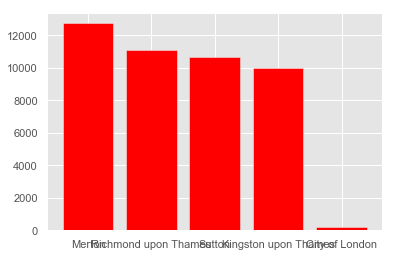

In [461]:
plt.bar(x, y, color='red')

In [458]:
b5dff = dff.tail()

In [459]:
x = b5dff['Borough'].tolist()
y = b5dff['Total'].tolist()

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 5 artists>

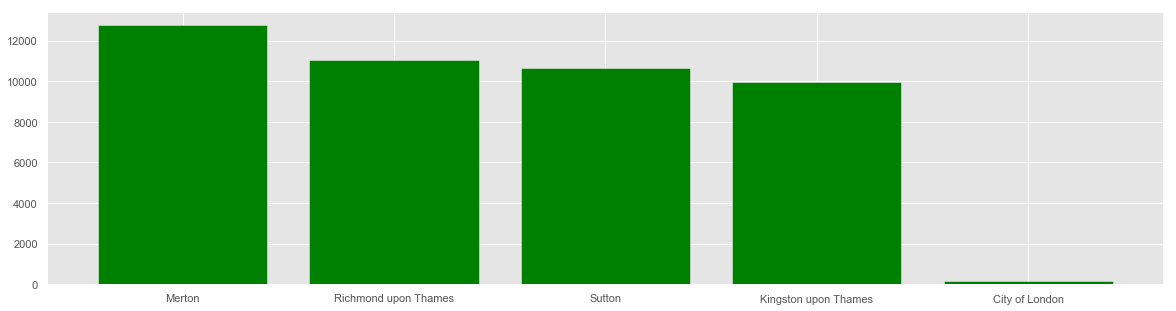

In [465]:
plt.figure(figsize=(20,5))
plt.bar(x, y, color='green')

Going into details into Kingston upon Thames

In [467]:
dfkut = dff[dff['Borough'] == 'Kingston upon Thames']

In [468]:
dfkut

,Borough,Buglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Aginst the Person,Total,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W


In [470]:
dfkut.columns

Index(['Borough', 'Buglary', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
       'Violence Aginst the Person', 'Total', 'Local authority',
       'Political control', 'Headquarters', 'Area (sq mi)',
       'Population (2013 est)[1]', 'Co-ordinates'],
      dtype='object')

In [471]:
x = ['Buglary', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
       'Violence Aginst the Person']

In [472]:
y = [879, 1054, 743, 189, 121, 3803, 3194]

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 7 artists>

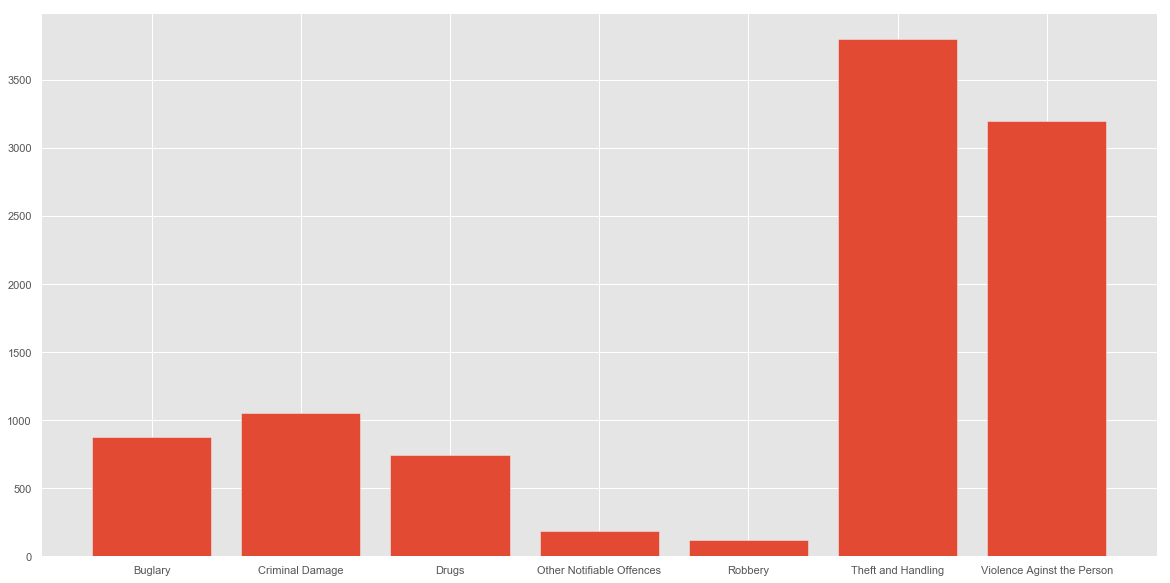

In [476]:
plt.figure(figsize=(20,10))
plt.bar(x, y)

In [477]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [478]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [479]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [481]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


In [482]:
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [488]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [489]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [490]:
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [491]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hook,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kingston Vale,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston upon Thames,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000,0.000000
5,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New Malden,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Norbiton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.038462,0.000000,0.000000,0.038462
9,Old Malden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000


In [492]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0                  Park  0.25
1  Gym / Fitness Center  0.25
2              Bus Stop  0.25
3            Print Shop  0.25
4      Asian Restaurant  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1                  Café  0.07
2  Gym / Fitness Center  0.07
3                  Park  0.07
4     Fish & Chips Shop  0.07


----Hook----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.25
2      Grocery Store  0.25
3  Fish & Chips Shop  0.25
4               Park  0.00


----Kingston Vale----
              venue  freq
0               Bar  0.25
1     Grocery Store  0.25
2    Sandwich Place  0.25
3      Soccer Field  0.25
4  Asian Restaurant  0.00


----Kingston upon Thames----
              venue  freq
0              Café  0.10
1       Coffee Shop  0.10
2               Pub  0.07
3      Burger Joint  0.07
4  Sushi Restaurant  0.07


----Malden Rushett----
              venue  freq
0       

In [493]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [494]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Print Shop,Bus Stop,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Department Store
1,Canbury,Pub,Gym / Fitness Center,Shop & Service,Plaza,Café,Fish & Chips Shop,Hotel,Indian Restaurant,Spa,Supermarket
2,Hook,Grocery Store,Bakery,Indian Restaurant,Fish & Chips Shop,French Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Furniture / Home Store
3,Kingston Vale,Grocery Store,Sandwich Place,Bar,Soccer Field,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
4,Kingston upon Thames,Café,Coffee Shop,Sushi Restaurant,Burger Joint,Pub,Asian Restaurant,Furniture / Home Store,French Restaurant,Electronics Store,Department Store


In [495]:
from sklearn.cluster import KMeans


kclusters = 5
kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)
kmeans.labels_[0:10]

array([3, 2, 2, 0, 2, 4, 0, 2, 2, 1], dtype=int32)

In [496]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
kut_merged = kut_neig
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
kut_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,3.0,Gym / Fitness Center,Park,Print Shop,Bus Stop,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Department Store
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2.0,Pub,Gym / Fitness Center,Shop & Service,Plaza,Café,Fish & Chips Shop,Hotel,Indian Restaurant,Spa,Supermarket
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,2.0,Grocery Store,Bakery,Indian Restaurant,Fish & Chips Shop,French Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Furniture / Home Store


In [498]:
kut_merged.dropna(inplace = True)

In [499]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [500]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

### Results and Discussion 


The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.